In [1]:
import csv
import random
random.seed(27)

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
sns.set()

In [2]:
lines = []
with open("data/driving_log.csv") as csv_file:
    reader = csv.reader(csv_file)
    for line in reader:
        lines.append(line)

In [3]:
images = []
measurements = []
for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split("\\")[-1]
        current_path = 'data/IMG/' + filename
        image = cv2.imread(current_path)
        image_c = image[64:140, 0:320, :]
        #image_c = cv2.resize(image_c, dsize=(160, 38), interpolation=cv2.INTER_CUBIC)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # center
        if i == 0:
            measurement = float(line[3])
            measurements.append(measurement)
            images.append(image_c)
        # left
        elif i == 1:
            measurement = float(line[3])
            measurements.append(measurement + 0.15)
            images.append(image_c)
        # right
        elif i == 2:
            measurement = float(line[3])
            measurements.append(measurement - 0.3)
            images.append(image_c)

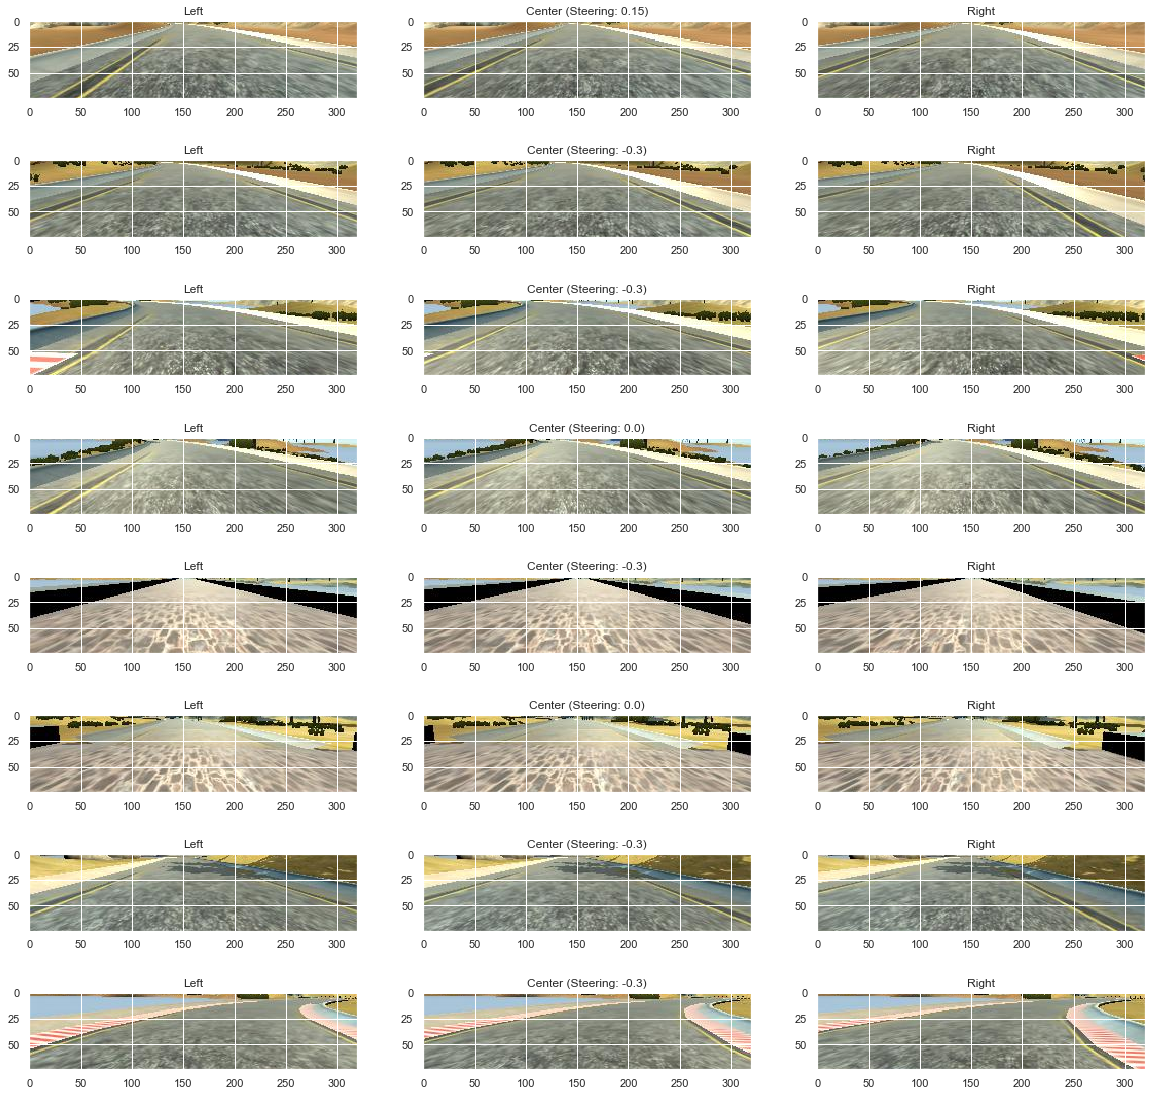

In [4]:
indexes = [100, 200, 350, 400, 500, 600, 725, 815]
fig, axes = plt.subplots(len(indexes), 3, figsize=(20, 20))

for i in range(len(indexes)):
    idx = indexes[i]
    image_l = cv2.imread(lines[idx][1])
    image_l = cv2.cvtColor(image_l, cv2.COLOR_BGR2RGB)
    image_l = image_l[60:135, 0:320, :]

    image_c = cv2.imread(lines[idx][0])
    image_c = cv2.cvtColor(image_c, cv2.COLOR_BGR2RGB)
    image_c = image_c[60:135, 0:320, :]

    image_r = cv2.imread(lines[idx][2])
    image_r = cv2.cvtColor(image_r, cv2.COLOR_BGR2RGB)
    image_r = image_r[60:135, 0:320, :]

    axes[i, 0].set_title("Left")
    axes[i, 0].imshow(image_l)
    axes[i, 1].set_title("Center (Steering: " + str(measurements[idx]) + ")")
    axes[i, 1].imshow(image_c)
    axes[i, 2].set_title("Right")
    axes[i, 2].imshow(image_r)
plt.show()

In [5]:
unique, counts = np.unique(np.array(measurements), return_counts=True)

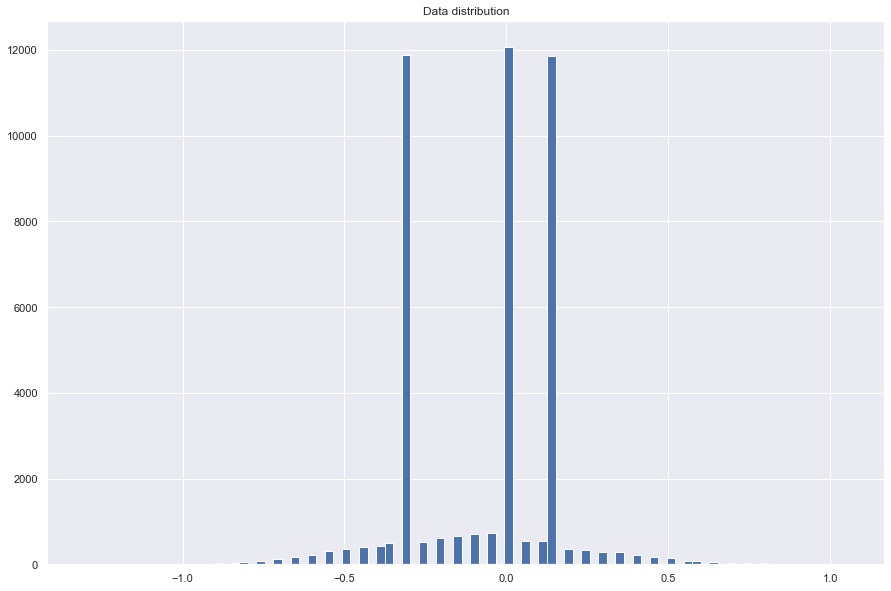

In [6]:
fig = plt.figure(figsize=(15,10))
plt.title("Data distribution")
plt.hist(measurements, bins=len(unique))
plt.show()

In [7]:
steerings = {}
for i in range(len(unique)):
    steerings[unique[i]] = counts[i]
freq = {k: v for k, v in sorted(steerings.items(), key=lambda item: item[1])}
freq = pd.DataFrame(freq.items(), columns=['steering', 'count'])
freq = freq.sort_values(by=['count'], ascending=False)
freq.head(10)

,steering,count
88,0.00,12074
87,-0.30,11821
86,0.15,11800
85,-0.15,653
84,-0.10,553
83,-0.25,524
82,-0.35,445
81,-0.40,401
80,0.05,391
79,-0.20,328


In [8]:
augmented_images, augmented_measurements = [], []

for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image, 1))
    augmented_measurements.append(measurement*-1.0)

In [9]:
unique, counts = np.unique(np.array(augmented_measurements), return_counts=True)

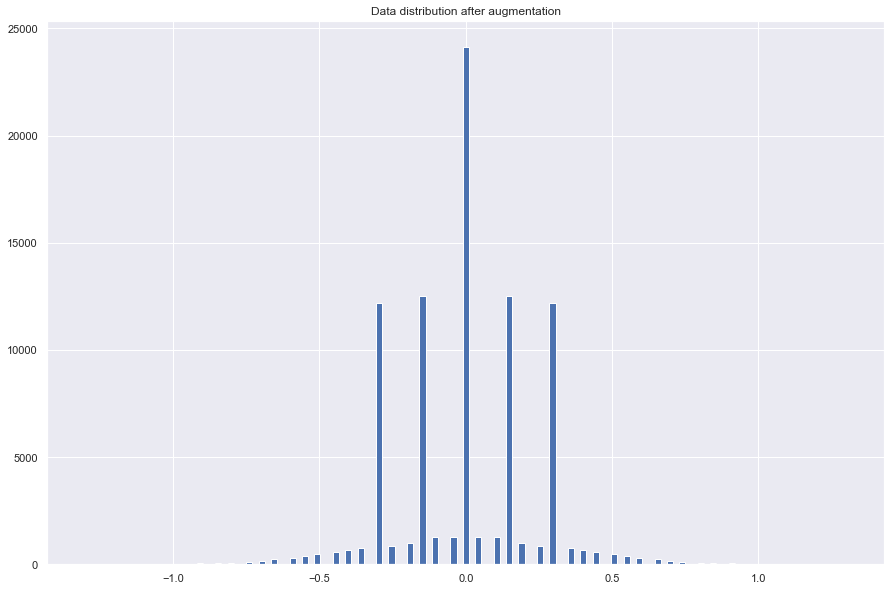

In [10]:
fig = plt.figure(figsize=(15, 10))
plt.title("Data distribution after augmentation")
plt.hist(augmented_measurements, bins=len(unique))
plt.show()

In [11]:
augmented_images, augmented_measurements = shuffle(augmented_images, augmented_measurements, random_state=27)
X_train, X_val, y_train, y_val = train_test_split(augmented_images,
                                                  augmented_measurements,
                                                  test_size=0.2,
                                                  random_state=27)

In [12]:
np.save("X_train", X_train)
np.save("y_train", y_train)
np.save("X_val", X_val)
np.save("y_val", y_val)